In [ ]:
# simple linear regression and plot (stupid way)

In [1]:
from scipy import stats
import numpy as np
np.random.seed(12345678)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('slope:  %.4f   intercept: %.4f   SD: %.4f    p_value: %.4f'%(slope,intercept,std_err,p_value))
print('r_squre: %.4f'%(r_value**2))



slope:  1.9449   intercept: 0.2686   SD: 0.4124    p_value: 0.0015
r_squre: 0.7355


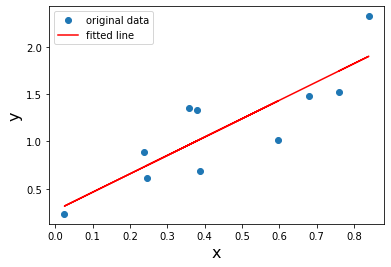

In [3]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.show()

In [ ]:
# regression use statsmodels

In [4]:
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets

data=datasets.load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X=df
y=target 
X=sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/jiasheng/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        17:36:20   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# stepwise with self-defined function 

In [6]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

/Users/jiasheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  const                          with p-value 9.37062e-216
Add  LSTAT                          with p-value 5.0811e-88
Add  RM                             with p-value 3.47226e-27
Add  PTRATIO                        with p-value 1.64466e-14
Add  DIS                            with p-value 1.66847e-05
Add  NOX                            with p-value 5.48815e-08
Add  CHAS                           with p-value 0.000265473
Add  B                              with p-value 0.000771946
Add  ZN                             with p-value 0.00465162
resulting features:
['const', 'LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN']


In [ ]:
# cross validation 

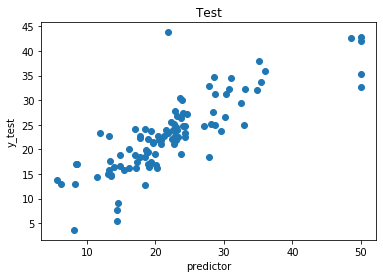

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
plt.scatter(y_test,predictions)
plt.gca().set(title='Test', xlabel='predictor',ylabel='y_test')
plt.show()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              720.6
Date:                Thu, 13 Feb 2020   Prob (F-statistic):                   8.43e-264
Time:                        17:36:33   Log-Likelihood:                         -1213.8
No. Observations:                 404   AIC:                                      2454.
Df Residuals:                     391   BIC:                                      2506.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1023      0.035     -2.902      0.004      -0.172      -0.033
ZN             0.0607      0.017      3.552      0.000       0.027       0.094
INDUS         -0.0592      0.072     -0.826      0.410      -0.200       0.082
CHAS           3.1274      1.020      3.065      0.002       1.121       5.134
NOX           -0.3921      3.879     -0.101      0.920      -8.019       7.235
RM             5.8407      0.342     17.101      0.000       5.169       6.512
AGE           -0.0207      0.015     -1.343      0.180      -0.051       0.010
DIS           -1.2332      0.231     -5.350      0.000      -1.686      -0.780
RAD            0.1961      0.079      2.478      0.014       0.041       0.352
TAX           -0.0099      0.005     -2.181      0.030      -0.019      -0.001
PTRATIO       -0.2817      0.125     -2.260      0.024      -0.527      -0.037
B              0.0141      0.003      4.769      0.000       0.008       0.020
LSTAT         -0.4204      0.057     -7.403      0.000      -0.532      -0.309
==============================================================================
Omnibus:                      189.305   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1222.264
Skew:                           1.901   Prob(JB):                    3.88e-266
Kurtosis:                      10.626   Cond. No.                     8.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""